In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn import neighbors as nn
from sklearn import preprocessing


In [13]:
df = pd.read_csv("/Users/08volt/Desktop/Drifts/splitting-clusters/4/splitting-clustersincremental.csv", header= None)
df

,0,1,2,3
0,0.086592,-0.676033,1.0,NaN
1,0.008271,0.997962,0.0,NaN
2,0.819168,0.015320,0.0,NaN
3,-0.142432,-0.383814,0.0,NaN
4,0.924829,-0.581015,0.0,NaN
...,...,...,...,...
99995,-0.462877,0.701494,1.0,NaN
99996,0.269252,0.546207,0.0,NaN
99997,0.735926,0.572773,0.0,NaN
99998,0.546939,-0.520304,0.0,NaN


In [14]:
Y_tot = df[2]
X_tot = df.drop([2,3],axis = 1)

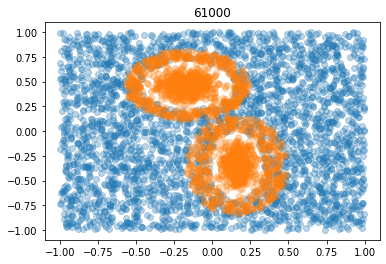

In [15]:
plt.style.use('seaborn-pastel')
fig = plt.figure()
ax = plt.axes(xlim=(-1, 1), ylim=(-1, 1))
colors = ['tab:blue', 'tab:orange', 'tab:green']

def init():
    Y = Y_tot.loc[:10000]
    X = X_tot.loc[0:10000,:]
    for cl in Y.unique():
        x = X[0][Y==cl]
        y = X[1][Y==cl]
        ax.scatter(x, y,label=cl, c = colors[int(cl)],alpha=0.3)
    return ax.plot()
def animate(i=0):
    ax.clear()
    plt.title(str(40000+1000*i))
    Y = Y_tot.loc[40000+1000*i:45000+1000*i]
    X = X_tot.loc[40000+1000*i:45000+1000*i,:]
    for cl in Y.unique():
        x = X[0][Y==cl]
        y = X[1][Y==cl]
        ax.scatter(x, y,label=cl, c = colors[int(cl)],alpha=0.3)
    return ax.plot()

anim = FuncAnimation(fig, animate,frames=22, interval=1000, blit=True)
anim.save('splitting-clustersincremental.gif', writer='imagemagick')


In [ ]:
splits = [(0,10000),(45000,55000),(55000,65000)]
for s in splits:
    fig, ax = plt.subplots()
    colors = ['tab:blue', 'tab:orange', 'tab:green']
    Y = Y_tot.loc[s[0]:s[1]]
    print(Y)
    X = X_tot.loc[s[0]:s[1],:]
    print(X)
    for cl in Y.unique():

        x = X[0][Y==cl]
        y = X[1][Y==cl]
        print(cl)
        ax.scatter(x, y,label=cl, c = colors[int(cl)],
                   alpha=0.3)

    ax.legend()
    ax.grid(True)

    plt.show()

In [ ]:
Knn = nn.KNeighborsClassifier(algorithm="brute", n_jobs=-1)
Knn.fit(X,Y)
majorityClass = np.bincount(Y).argmax()
category = ["safe","borderline","rare","outlier"]
nearest = Knn.kneighbors(n_neighbors= 5, return_distance= False)

In [ ]:
results = pd.DataFrame(columns = ["i","class", "category"])
for i,n in enumerate(nearest):
    cl = Y[i]
    same = 0
    other = 0
    category = "safe"
    for nnn in n:
        if Y[nnn] == cl:
            same += 1
        else:
            other += 1
    if same == 1:
        category = "outlier"
    elif same <= 2:
        category = "rare"
    elif same <= 4:
        category = "borderline"

    df2 = pd.DataFrame([[i,cl,category]],columns = ["i","class", "category"])

    results = results.append(df2)

In [ ]:
zeros = results[results["class"]==majorityClass].count()[0]
ones = results[results["class"]!= majorityClass].count()[0]
categories_counts = results.groupby(["class","category"]).count()
categories_counts = categories_counts.reset_index()
categories_counts

In [ ]:
def map_p(i):
    divider = zeros
    if categories_counts["class"][i] != majorityClass:
        divider = ones
    return int(categories_counts["i"][i] * 10000/divider) / 100



categories_counts["p"] = pd.Series(categories_counts.index).apply(map_p)
categories_counts